<a href="https://colab.research.google.com/github/Gustavo-SH09/Data_Science/blob/main/AIRBNB_Primeiro_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados do Airbnb - Veneza(Itália)

O AIRBNB é uma plataforma de hospedagem, que oferece outras opções além de hotéis, albergues e hostels para viajantes do mundo inteiro, sendo uma alternativa mais barata em relação a acomodações mais tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do Site [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é disponibilizado uma grande quantidade de dados, que possivelmente possa estar sendo usada para Data Science as análises diversas.




<img alt="Colaboratory logo" width="50%" src="https://github.com/Gustavo-SH09/Dados-Utilitarios/blob/main/7d89b8f512e048c14fef7124e0bd4815vvv.jpg?raw=true">




# Relatório Veneza


Venho por meio deste, efetuar uma pesquisa quantitativa referente a preços, locais e melhores experiencias de hospedagens em Veneza. O intuito desta pesquisa é dar uma resolução breve de um mapa de preços e localidades, para que assim possamos ter uma bagagem de conhecimento como consumidor frequente no ramo hoteleiro, obtendo uma maximização no ato de se hospedar nos melhores lugares pelos melhores preços disponíveis.


# Análise de dados AIRBNB

\


<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

>Informações adiquiridas a partir de ("http://insideairbnb.com/get-the-data.html") Posteriormente acessando os dados de Veneza/Italia = informações resumidas!!

In [ ]:
#pacotes necessários (biblioteca)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/Gustavo-SH09/Dados-Utilitarios/main/Dates_venice.csv")

#Analise de Dados

***Dicionario de variaveis*** 

*  id = número de identificação dada a propriedade de um anfitrião
* Name = Nome da propriedade anunciada
* host_id = número do id do propriedade(anfitrião) 
* host_name = nome do anfitrião
* neighbourhood_group = esta coluna nao contem nunhum valor válido
* neighbourhood = nome do bairro
* latitude = coordenada da latitude da propriedade
* longitude = coordenada da longitude da propriedade
* room_typo = informa o tipo de quarto que esta sendo ofertado
* price = preço para alugar o imovel
* minimum nights = quantidade minima de noites para reservar
* number_of_review = número de reviews que a prorpiedade possui
* last_review = data do ultimo review
* reviews_per_month = quantidade de review por mês
* calculed_host_listings_count = quantidade de imóveis ofertados pelo mesmo anfitrião
* avaliability_365 = número de dias de disponibilidade dentro de 365 dias.




Primeiramente, iremos visualizar as primeiras entradas do dataset para que assim tenhamos uma noção dos dados contidos.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.43817,12.32739,Entire home/apt,225,3,163,2019-06-26,1.50,3,352,1,NaN
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,Santa Croce,45.43977,12.32736,Entire home/apt,149,4,65,2016-07-17,0.66,3,340,1,NaN
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,San Polo,45.43896,12.32970,Entire home/apt,122,4,186,2021-10-20,1.51,3,347,2,NaN
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,Isole,San Marco,45.43277,12.33456,Private room,150,1,412,2021-10-16,3.26,2,213,2,NaN
4,44527,Historical Luxury Apartment on Calm Sunny Canal,120215,Marc & Elisabeth,Isole,Cannaregio,45.44569,12.32902,Entire home/apt,280,2,82,2021-11-30,1.41,1,298,10,NaN


# Correlação 

#Volume de Dados

A indentificação dos tipos de dados e o volumes em que eles se emcontram no dataset.

In [ ]:
#volume de dados de DataFrame indentificados
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

#cinco primeiras entradas do dataset verificado
display(df.dtypes)

Entradas:	 7352
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [ ]:
# ordenando em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.835147
reviews_per_month                 0.126360
last_review                       0.126360
host_name                         0.000272
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

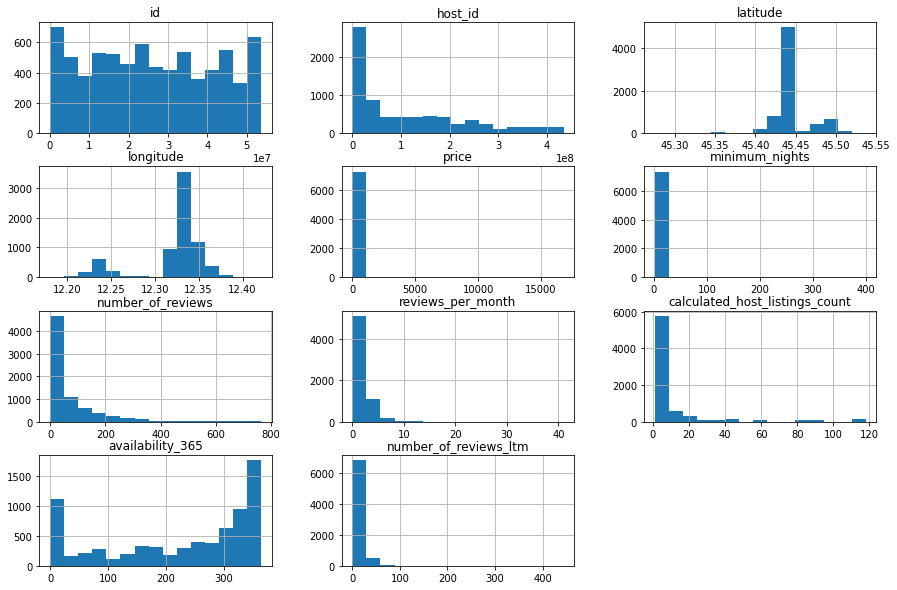

In [ ]:
#plotando histograma de variaveis numericas
df.hist(bins=15, figsize=(15,10));

# Provavelmente há a ocorrencia de Outliers presentes

Pela distribuição do histograma, é possivel verificar indícios da presença de Outliers. Olhe por exemplo as variáveis `price`, `minimum_nights`, `number_of_reviews`, `reviwes_per_month`, `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecçao de outliers. \

São elas: \

* Resumo estátivo por meio do método `describe()`
* Plotar `boxplots` par a variável.

In [ ]:
# vendo o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights',	'number_of_reviews', 'last_review',	'reviews_per_month',	'calculated_host_listings_count',	'availability_365']].describe()
   

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7352.000000,7352.000000,7352.000000,6423.000000,7352.000000,7352.000000
mean,207.433624,2.458379,64.155196,1.674826,9.944505,223.943009
std,1071.099970,8.458218,92.773721,1.741708,20.490939,129.938807
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,70.000000,1.000000,4.000000,0.460000,1.000000,109.000000
50%,100.000000,2.000000,25.000000,1.200000,3.000000,270.000000
75%,145.000000,3.000000,88.000000,2.360000,7.000000,339.000000
max,16800.000000,400.000000,765.000000,41.000000,118.000000,365.000000


visualizando os arquivos acima, podemos chegar a conclusao de que:    
* a variavel `price` tem 75% dos valores a baixo de 145, porém, seu volaro máximo atinge o valor de 9999.
* a quantidade minima de noites em `minimum_nigths` está em 1 dia ao ano.

#Boxplot para minimum_nights

minimum_nights: valores acima de 5:
178 entradas
2.4211%


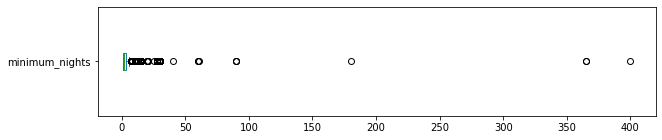

In [ ]:
#minimo de noites / minimum_nights


df.minimum_nights.plot(kind='box', vert=False, figsize=(10,2))

#ver a quantidade de valores acima de 5 dias para minimum_nights
print("minimum_nights: valores acima de 5:")
print("{} entradas".format(len(df[df.minimum_nights>5])))
print("{:.4f}%".format((len(df[df.minimum_nights>5]) / df.shape[0])*100))

Sendo assim, todos os valores fora do retângulo são Outliers. Temos 178 locais que tem estadia minima de 5 dias, o que culmina em 2,42% da base de dados.

A escolha por optar apenas pelos 5 dias resulta nas poucas diarias em que os hospedes se mantem, causando Outliers em hospedes que se mantem por um tempo prolongado.

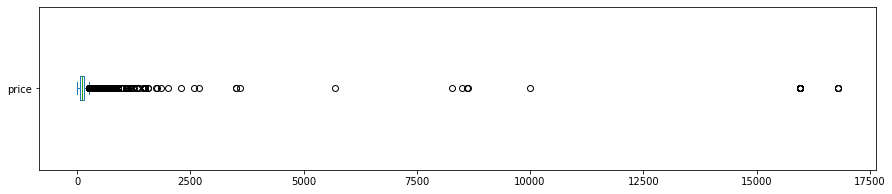


price: valores acima de 500
184 entradas
2.5027%


In [ ]:
# Boxplot para preço
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

# ver a quantidade de valores acima de 500 para price
print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

Assim, os valores fora do retângulo são Outliers. Temos 184 locais que tem valores acima de 500, o que resulta em aproximadamente 2,5% da base de dados do dataset.  
A preferencia pelo valor expecifico "500" é resultado dos preços presentes em Veneza

#**Histograma sem outliers**



já que identificamos nas variáveis `price` e `minimum_nights`, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

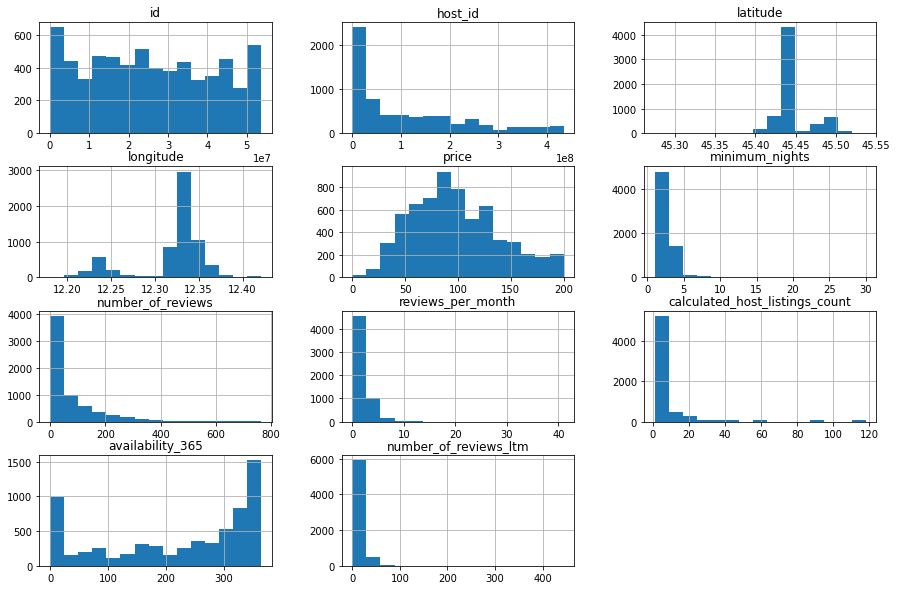

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)


# remover ´neigbourhood_group´, pois está vazio.
df_clean.drop('license', axis=1, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Percebemos, então, que ao tirarmos alguns outliers conseguimos visualizar melhor como nossos dados estão distribuídos. Isto faz com que os insights tirados do histograma tenham uma probabilidade maior de compactuarem com a realidade do nosso problema!

# Qual a corelação existente entre as variáveis 

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação por semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intencidade dela. Para identificar as correlações existentes entre as variaveis de interese, vou:    
* Criar uma matriz de correlação 
* Gerar ym *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# Criando uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.051486,-0.195054,-0.189729,0.222105,0.096450
minimum_nights,0.051486,1.000000,-0.029767,-0.095339,-0.047811,-0.033700
number_of_reviews,-0.195054,-0.029767,1.000000,0.627808,-0.151617,0.002730
reviews_per_month,-0.189729,-0.095339,0.627808,1.000000,-0.110781,0.027720
calculated_host_listings_count,0.222105,-0.047811,-0.151617,-0.110781,1.000000,0.133591
availability_365,0.096450,-0.033700,0.002730,0.027720,0.133591,1.000000


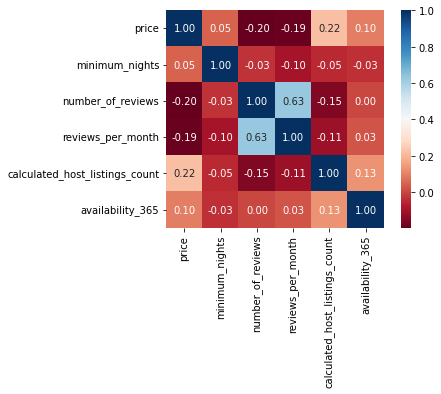

In [ ]:
# Plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [ ]:
# mostrando a quantidade de cada tipo de imovel disponivel

df_clean.room_type.value_counts()

Entire home/apt    5496
Private room       1434
Hotel room          198
Shared room          29
Name: room_type, dtype: int64

In [ ]:
# Mostrando a porcentagem em que cada tipo de imovel está disponivel
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.767920
Private room       0.200363
Hotel room         0.027665
Shared room        0.004052
Name: room_type, dtype: float64

# ***Qual a localização mais cara de Veneza***
uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (neigbourhoods) a patir do preço de locação.

In [ ]:
#vendo o preço dos bairos, na média 

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Alberoni             200.968750
Isola San Giorgio    200.000000
Tronchetto           174.200000
Torcello             165.000000
San Marco            153.697905
Dorsoduro            137.831793
San Polo             132.978339
Santa Croce          130.169708
Case Dosa            125.000000
Lido                 124.753165
Name: price, dtype: float64

Acima, vemos que os bairros como Alberoni, Malamocco e Lido, estão com a média de preços superior e muito menos presente a alguns lugares como san marco, considerado o bairro mais caro de veneza.

uma pessoa que nao conhece-se veneza, poderia apresentar esses resultados adiquiridos até aqui sem questionamento por parte dela. só lhes dando um unico exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para Pellestrina.

In [ ]:
#ver a quantidade de imóveis disponiveis em Pellestrina.

print(df_clean[df_clean.neighbourhood == "Pellestrina"].shape)

#ver as 3 entradas de Castello.
df_clean[df_clean.neighbourhood == "Pellestrina"]

(5, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
380,1513368,LIVE YOUR DREAMS in Pellestrina!,5521362,Davide,Pellestrina,45.28413,12.30365,Entire home/apt,60,2,149,2019-09-13,1.72,1,296,11,NaN
5274,37833769,Cosy and lovely place in Pellestrina,8889817,Costanza,Pellestrina,45.28175,12.30290,Entire home/apt,55,3,0,NaN,NaN,1,326,0,NaN
5869,43087830,"Locanda Stravedo, camera con vista mozzafiato",163282708,Michele,Pellestrina,45.28625,12.30366,Private room,135,2,0,NaN,NaN,3,12,0,NaN
6438,48088593,"Locanda Stravedo, camera con vista al piano terra",163282708,Michele,Pellestrina,45.28603,12.30383,Private room,125,2,1,2021-06-25,0.18,3,15,1,NaN
6646,49915867,"Dimora Scarpa, abitazione tipica isolana",402515359,Alberta,Pellestrina,45.27439,12.30196,Entire home/apt,110,1,7,2021-05-30,1.12,1,1,7,NaN


Como são fornecidoas as latitudes e longitudes para os imóveis, é possivel plotar cada ponto. Para isso, considera-se **`x=longitude`** e **`y=latitude`**

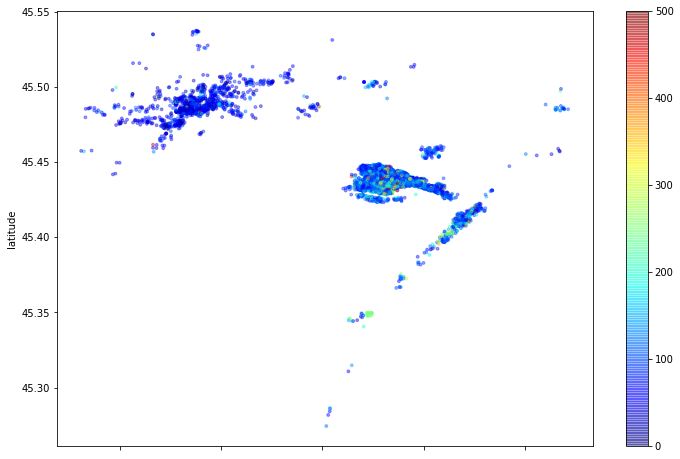

In [ ]:
#plotar os imóveis pela latitude e longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))


# ***conclusão***

Foram feitas apenas análises superficiais na base de dados extraido da plataforma AIRBNB, porem já se percebeu que existe outliers em algumas variaveis.

Também foi possivel analizar que em algumas localidades há uma certa quantia inferior de imóveis referente ao total comum em outras localidades, culminando em uma distorção consideravel nos rezultados obtidos por meio desta pesquisa.

Outrossim, vejo que as ferramentas disponibilizadas pela forma de linguagem denominada python se apresenta relativamente expantosa aos olhos de um iniciante, possivelmente lhe amedrontando em questões de má doutrinação desta ferramenta. python é uma linguagem a qual nos abdica muito tempo de dedicação, demandando muito carga cognitiva sobre seus scripts, nos sobrecarregando com seus detalhes meramente estéticos em uma primeira visão, mas vista por uma pessoa mais lucida no assunto, tais detalhes são o que diferencia o Norte do Sul. Portanto, o empenho em dominar tais linguagens de comiunicação entre ***Ser*** e ***Maquina*** são complexos, mas consideravelmente importantes e uteis.